## **Personal Information**

**Nama**: Dinar Wahyu Rahman

**Email**: dinarrahman30@gmail.com

**LinkedIn**: **[Dinar Wahyu Rahman](https://www.linkedin.com/in/dinar-wahyu-rahman/)**

**Github**: https://www.github.com/dinarrahman30/

![Accenture](https://enggsolution.com/faculty/imgs/news/Accenture%20hiring.png)

# **Accenture North America - Data Cleaning and Modeling**


#### clarify why you made this selection:

* The brief carefully it states that the client wanted to see “An analysis of their content categories showing the top 5 categories with the largest popularity”.
* As explained in the data model, popularity is quantified by the “Score” given to each reaction type.
* We therefore need data showing the content ID, category, content type, reaction type, and reaction score.
* So, to figure out popularity, we’ll have to add up which content categories have the largest score.

### **Data Cleaning**

##### Open Data

In [2]:
# import library
import pandas as pd
import numpy as np
import os

In [3]:
# import dataset from csv file
for dirname, _, filenames in os.walk('D:\ACCENTURE NORTH AMERICA\Task 2\Resource'): # open files
    for filename in filenames:
        print(os.path.join(dirname, filename))

content = pd.read_csv('D:\ACCENTURE NORTH AMERICA\Task 2\Resource\Content.csv', sep=';')
reaction = pd.read_csv('D:\ACCENTURE NORTH AMERICA\Task 2\Resource\Reactions.csv', sep=';')
reaction_type = pd.read_csv('D:\ACCENTURE NORTH AMERICA\Task 2\Resource\ReactionTypes.csv', sep=';')

D:\ACCENTURE NORTH AMERICA\Task 2\Resource\Content.csv
D:\ACCENTURE NORTH AMERICA\Task 2\Resource\Reactions.csv
D:\ACCENTURE NORTH AMERICA\Task 2\Resource\ReactionTypes.csv


In [4]:
content.head()

,Unnamed: 0,Content IDE,User IDE,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
reaction.head()

,Unnamed: 0,Content IDE,User IDE,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,22/04/2021 15.17
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,07/11/2020 09.43
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,17/06/2021 12.22
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,18/04/2021 05.13
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,06/01/2021 19.13


In [6]:
reaction_type.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


##### Checking Missing Value

In [7]:
# Check for missing values
mv_content = content.isnull().sum()
mv_reaction = reaction.isnull().sum()
mv_reaction_type = reaction_type.isnull().sum()

# Print or handle the results
print("Missing Values in Dataset 1:")
print(mv_content)

print("\nMissing Values in Dataset 2:")
print(mv_reaction)

print("\nMissing Values in Dataset 3:")
print(mv_reaction_type)

Missing Values in Dataset 1:
Unnamed: 0       0
Content IDE      0
User IDE         0
Type             0
Category         0
URL            199
dtype: int64

Missing Values in Dataset 2:
Unnamed: 0        0
Content IDE       0
User IDE       3019
Type            980
Datetime          0
dtype: int64

Missing Values in Dataset 3:
Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64


##### Clean Dataset

In [8]:
# Handling missing values
df1_cleaned = content.dropna()  # Drop rows with any missing values
df2_cleaned = reaction.dropna()
df3_cleaned = reaction_type.dropna()

# Print cleaned data or further processing
print("Dataset 1 cleaned shape:", df1_cleaned.shape)
print("Dataset 2 cleaned shape:", df2_cleaned.shape)
print("Dataset 3 cleaned shape:", df3_cleaned.shape)

Dataset 1 cleaned shape: (801, 6)
Dataset 2 cleaned shape: (22534, 5)
Dataset 3 cleaned shape: (16, 4)


In [9]:
# Check again for missing values
mv_content = df1_cleaned.isnull().sum()
mv_reaction = df2_cleaned.isnull().sum()
mv_reaction_type = df3_cleaned.isnull().sum()

# Print or handle the results
print("Missing Values in Dataset 1:")
print(mv_content)

print("\nMissing Values in Dataset 2:")
print(mv_reaction)

print("\nMissing Values in Dataset 3:")
print(mv_reaction_type)

Missing Values in Dataset 1:
Unnamed: 0     0
Content IDE    0
User IDE       0
Type           0
Category       0
URL            0
dtype: int64

Missing Values in Dataset 2:
Unnamed: 0     0
Content IDE    0
User IDE       0
Type           0
Datetime       0
dtype: int64

Missing Values in Dataset 3:
Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64


In [26]:
# List of columns to drop (adjust as per your requirement)
columns_to_drop = ['Unnamed: 0']

# Drop columns from each dataset
content = df1_cleaned.drop(columns=columns_to_drop, errors='ignore')
reaction = df2_cleaned.drop(columns=columns_to_drop, errors='ignore')
reaction_type = df3_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Print or further process cleaned datasets
print("Columns dropped from Dataset 1:", content.columns)
print("Columns dropped from Dataset 2:", reaction.columns)
print("Columns dropped from Dataset 3:", reaction_type.columns)

Columns dropped from Dataset 1: Index(['Content IDE', 'User IDE', 'Type', 'Category', 'URL'], dtype='object')
Columns dropped from Dataset 2: Index(['Content IDE', 'User IDE', 'Type', 'Datetime'], dtype='object')
Columns dropped from Dataset 3: Index(['Type', 'Sentiment', 'Score'], dtype='object')


In [11]:
# Save cleaned datasets if needed
# df1_cleaned.to_csv('content.csv', index=False)
# df2_cleaned.to_csv('reactions.csv', index=False)
# df3_cleaned.to_csv('reaction_types.csv', index=False)

### **Data Modelling**

##### Drop Unused Columns

In [27]:
# first drop
unused_columns = ['User IDE']
content = content.drop(unused_columns, axis = 1)
reaction = reaction.drop(unused_columns, axis = 1)

print(r'Drop Unused Columns Completed', content, reaction)

Drop Unused Columns Completed                               Content IDE   Type        Category  \
0    97522e57-d9ab-4bd6-97bf-c24d952602d2  photo        Studying   
1    9f737e0a-3cdd-4d29-9d24-753f4e3be810  photo  healthy eating   
2    230c4e4d-70c3-461d-b42c-ec09396efb3f  photo  healthy eating   
3    356fff80-da4d-4785-9f43-bc1261031dc6  photo      technology   
4    01ab84dd-6364-4236-abbb-3f237db77180  video            food   
..                                    ...    ...             ...   
994  c54b49c4-b1f2-4641-8595-1cbd19937845  photo         science   
996  7a79f4e4-3b7d-44dc-bdef-bc990740252c    GIF      technology   
997  435007a5-6261-4d8b-b0a4-55fdc189754b  audio        veganism   
998  4e4c9690-c013-4ee7-9e66-943d8cbd27b7    GIF         culture   
999  75d6b589-7fae-4a6d-b0d0-752845150e56  audio      technology   

                                                   URL  
0    https://socialbuzz.cdn.com/content/storage/975...  
1    https://socialbuzz.cdn.com/content

In [28]:
# second drop
unused_columns = ['URL']
content = content.drop(unused_columns, axis = 1)

print(r'Drop Unused Columns Completed', content)

Drop Unused Columns Completed                               Content IDE   Type        Category
0    97522e57-d9ab-4bd6-97bf-c24d952602d2  photo        Studying
1    9f737e0a-3cdd-4d29-9d24-753f4e3be810  photo  healthy eating
2    230c4e4d-70c3-461d-b42c-ec09396efb3f  photo  healthy eating
3    356fff80-da4d-4785-9f43-bc1261031dc6  photo      technology
4    01ab84dd-6364-4236-abbb-3f237db77180  video            food
..                                    ...    ...             ...
994  c54b49c4-b1f2-4641-8595-1cbd19937845  photo         science
996  7a79f4e4-3b7d-44dc-bdef-bc990740252c    GIF      technology
997  435007a5-6261-4d8b-b0a4-55fdc189754b  audio        veganism
998  4e4c9690-c013-4ee7-9e66-943d8cbd27b7    GIF         culture
999  75d6b589-7fae-4a6d-b0d0-752845150e56  audio      technology

[801 rows x 3 columns]


##### Changing Columns Dataset

In [29]:
content.rename(columns={'Content IDE': 'Content ID'}, inplace=True)
content.rename(columns={'Type': 'Content Type'}, inplace=True)
reaction.rename(columns={'Content IDE': 'Content ID'}, inplace=True)
reaction.rename(columns={'Type': 'Reaction Type'}, inplace=True)
reaction_type.rename(columns={'Type': 'Reaction Type', 'Score': 'Reaction Score'}, inplace=True)

In [30]:
reaction.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09.43
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12.22
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05.13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19.13
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/08/2020 12.25


In [31]:
reaction_type.head()

,Reaction Type,Sentiment,Reaction Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


##### Merging Three Dataset Into One Dataset

In [32]:
# Merging content, reaction, and reaction_type
reaction_merged = pd.merge(reaction, reaction_type, on='Reaction Type', how='inner')
content_reaction_merged = pd.merge(content, reaction_merged, on='Content ID', how='inner')

In [33]:
content_reaction_merged.head()

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Reaction Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,07/11/2020 09.43,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,17/06/2021 12.22,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,18/04/2021 05.13,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,06/01/2021 19.13,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,23/08/2020 12.25,positive,30


##### Saving Clean Dataset to CSV and XLSX Format

In [37]:
content_reaction_merged.to_csv('D:\ACCENTURE NORTH AMERICA\Task 2\Clean Dataset.csv', index=False)

In [38]:
import openpyxl
content_reaction_merged.to_excel('D:\ACCENTURE NORTH AMERICA\Task 2\Clean Dataset.xlsx', index=False)

##### Find Top 5 With Largest Popularity

In [39]:
# Group by category and sum reaction scores
category_popularity = content_reaction_merged.groupby('Category')['Reaction Score'].sum().reset_index()

# Sort by reaction score in descending order
category_popularity_sorted = category_popularity.sort_values(by='Reaction Score', ascending=False)

# Get top 5 categories with largest popularity
top_categories = category_popularity_sorted.head(5)

print("Top 5 categories by popularity:")
print(top_categories)

Top 5 categories by popularity:
          Category  Reaction Score
15          travel           53935
10         science           53657
8   healthy eating           52745
1          animals           52443
2          cooking           49681


### **Data Analysis**

We know that the client wants to understand the top 5 content categories. Have a think about what are the best ways to present this? In a pie chart? In a bar chart?

There are also some other interesting insights that we might want to share with them. For example:

* How many unique categories are there?
* How many reactions are there to the most popular category?
* What was the month with the most posts?

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

**We know that the client wants to understand the top 5 content categories. Have a think about what are the best ways to present this? In a pie chart? In a bar chart?**

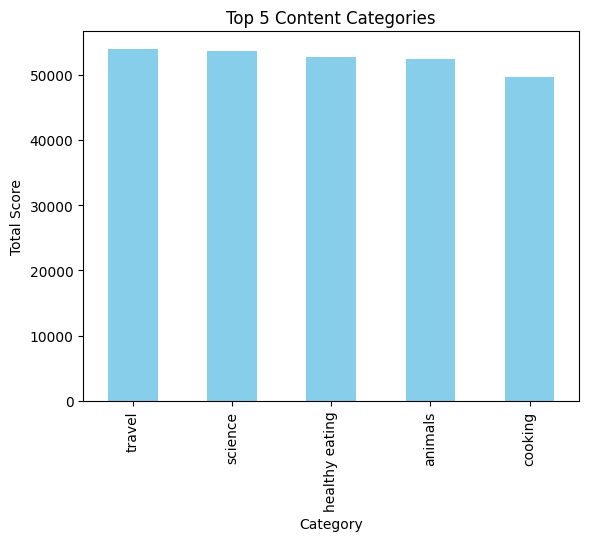

In [44]:
# bar chart

top_5 = content_reaction_merged.groupby('Category')['Reaction Score'].sum().nlargest(5)
top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Content Categories')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.show()

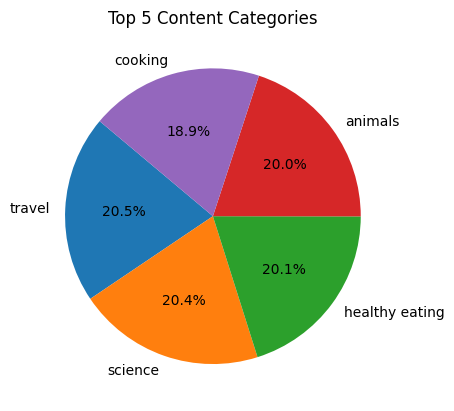

In [45]:
# pie chart
top_5.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Content Categories')
plt.ylabel('')
plt.show()

**How many unique categories are there?**

In [46]:
# Number of Unique Categories
unique_categories = content_reaction_merged['Category'].nunique()
print(f"Number of unique categories: {unique_categories}")

Number of unique categories: 17


**How many reactions are there to the most popular category?**

In [51]:
# Find the most popular category and the number of reactions
most_popular_category = content_reaction_merged['Category'].value_counts().idxmax()
reactions_most_popular_category = content_reaction_merged[content_reaction_merged['Category'] == most_popular_category]['Reaction Type'].count()
reactions_most_popular_category

1368

**What was the month with the most posts?**

In [52]:
# Convert Datetime column to datetime format
content_reaction_merged['Datetime'] = pd.to_datetime(content_reaction_merged['Datetime'], format='%d/%m/%Y %H.%M')

# Extract month and year from the Datetime column
content_reaction_merged['Month'] = content_reaction_merged['Datetime'].dt.to_period('M')

# Find the month with the most posts
most_posts_month = content_reaction_merged['Month'].value_counts().idxmax()
most_posts_month

Period('2020-08', 'M')